# Logistic Regression (maybe)
## -- Jon Santini
## -- 11/2/2023

### Access drools, SAS rules:

In [1]:
import pandas as pd
import numpy as np

grad_df = pd.read_csv('ipeds_csv.csv')

grad_df

,unitid,Total,Men,Women,Group
0,100654,1222,524,698,Incoming cohort (minus exclusions)
1,100654,343,120,223,Completers within 150% of normal time
2,100663,1587,623,964,Incoming cohort (minus exclusions)
3,100663,991,360,631,Completers within 150% of normal time
4,100690,6,3,3,Incoming cohort (minus exclusions)
...,...,...,...,...,...
3893,495767,11142,5834,5308,Completers within 150% of normal time
3894,496627,2,2,0,Incoming cohort (minus exclusions)
3895,496627,2,2,0,Completers within 150% of normal time
3896,496636,114,33,81,Incoming cohort (minus exclusions)


In [9]:
grad_df.corr()


/var/folders/vt/_0l7gq417g39vnw6cpd76ync0000gn/T/ipykernel_88570/4021969120.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  grad_df.corr()


,unitid,Total,Men,Women
unitid,1.000000,-0.166482,-0.149781,-0.177153
Total,-0.166482,1.000000,0.985481,0.988851
Men,-0.149781,0.985481,1.000000,0.949211
Women,-0.177153,0.988851,0.949211,1.000000


### Let's do some math for logistic?

$ \begin{align*}
P(Y=1) &= \frac{1}{1 + e^{-z}} \\
z &= \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n
\end{align*}$


### But wait, there's scikit-learn:

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

dependent_variable = "Group"
independent_variables = ['Men', 'Total', 'unitid']

# Split into training and testing sets
X = grad_df[independent_variables]
y = grad_df[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# logistic regression model
model = LogisticRegression()

# Fit model 
model.fit(X_train, y_train)

# predictions
y_pred = model.predict(X_test)

# accuracy score
model.score(X_test, y_test)

# Evaluate 
print(classification_report(y_test, y_pred))


                                       precision    recall  f1-score   support

Completers within 150% of normal time       0.62      0.77      0.69       393
   Incoming cohort (minus exclusions)       0.69      0.53      0.60       387

                             accuracy                           0.65       780
                            macro avg       0.66      0.65      0.64       780
                         weighted avg       0.66      0.65      0.64       780



In [13]:
print(X_test)

      Men  Total  unitid
3685    1      3  459994
912   102    260  154101
321    15     15  126076
2098  125    264  198507
1480   65    233  176035
...   ...    ...     ...
2382  115    189  206835
802    77    207  150941
247    10     13  119270
2941   32    107  227331
1003   33     66  157058

[780 rows x 3 columns]


In [16]:
model.predict_proba([[1, 3, 154101]])

/Users/jonathansantini/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.51228846, 0.48771154]])

# ...^^^What does that mean?

## Precision 
- Precision is the ability of the classifier **to correctly identify true positive samples (correctly predicted instances of the positive class) out of all instances it PREDICTS as positive.**
- For "Completers within 150% of normal time," the precision is 0.56, which means that 56% of the instances predicted as "Completers within 150% of normal time" were true positive cases.
- For "Incoming cohort (minus exclusions)," the precision is 0.64, indicating that 64% of the instances predicted as "Incoming cohort (minus exclusions)" were true positive cases.

## Recall
- Recall (or sensitivity) is the ability of the classifier **to correctly identify true positive samples out of all ACTUAL positive samples**
- For "Completers within 150% of normal time," the recall is 0.80, meaning that 80% of the actual "Completers within 150% of normal time" cases were correctly predicted.
- For "Incoming cohort (minus exclusions)," the recall is 0.36, indicating that 36% of the actual "Incoming cohort (minus exclusions)" cases were correctly predicted.

## F1-Score
- The F1-score is the harmonic mean (*mathematical average used to calculate the central tendency of a set of values*) of precision and recall and is often used as **a single metric that balances both precision and recall.**
- For "Completers within 150% of normal time," the F1-score is 0.66.
- For "Incoming cohort (minus exclusions)," the F1-score is 0.46.

## Support
- Support represents the **number of samples in each class.**
- For "Completers within 150% of normal time," there are 393 samples.
- For "Incoming cohort (minus exclusions)," there are 387 samples.

## Accuracy
- Accuracy is the **overall performance of the model**, measuring the proportion of correctly classified samples out of all samples. Overall accuracy is 0.58, which means that the model correctly classified 58% of the total samples.

## Macro Avg
The macro average **calculates the metrics (precision, recall, F1-score) separately for each class and then takes the average of those values.**

## Weighted Avg
The weighted average also calculates metrics separately for each class but takes a weighted average based on the number of samples in each class.

## Hm...
The model seems to have higher precision and recall for the "Completers within 150% of normal time" class compared to the "Incoming cohort (minus exclusions)" class. The choice between precision and recall may depend on specific problem and the trade-off between false positives and false negatives. 

# I'm still not clear... maybe I can draw a picture?

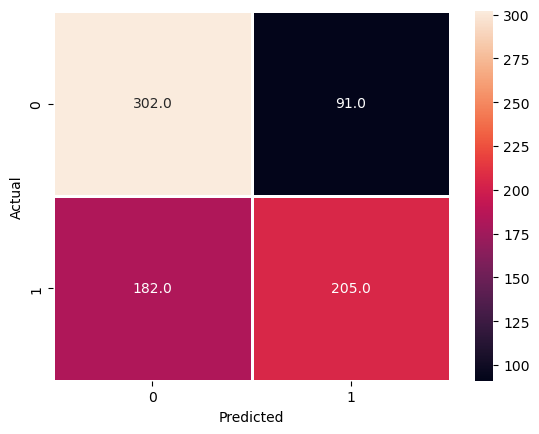

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".1f", linewidth=1)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROWS = PREDICTIONS?
# Top row = completers within 150% normal time (393 total)
# Bottom row = incoming cohort (387 total)

# COLUMNS = ACTUAL?
# Left column (564 total)
# Right column (216 total)

# Completers within 150% of normal time: 0
# Incoming cohort (minus exclusions): 1

# TOP RIGHT = FALSE POSITIVES
# TOP LEFT = TRUE POSITIVES

# BOTTOM RIGHT = TRUE NEGATIVES
# BOTTOM LEFT = FALSE NEGATIVES

# DIAGONAL TOP LEFT to BOTTOM RIGHT = how many times the samples were correctly classified
# DIAGONAL TOP RIGHT to BOTTOM LEFT = how many times the samples were INCORRECTLY classified

/var/folders/vt/_0l7gq417g39vnw6cpd76ync0000gn/T/ipykernel_88570/4144587069.py:12: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'r--', color='red', linestyle='--')
/var/folders/vt/_0l7gq417g39vnw6cpd76ync0000gn/T/ipykernel_88570/4144587069.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'r--', color='red', linestyle='--')


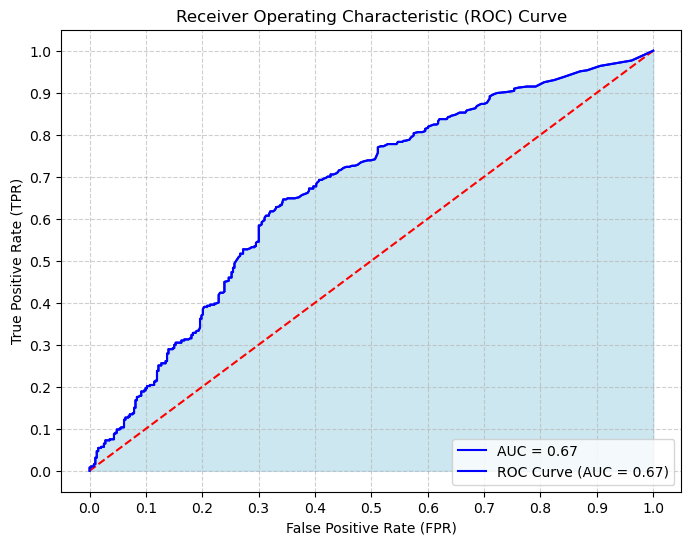

In [4]:
from sklearn.metrics import roc_curve, roc_auc_score

# Map class labels to binary values (0 and 1)
y_test_binary = y_test.map({'Completers within 150% of normal time': 0, 'Incoming cohort (minus exclusions)': 1})

fpr, tpr, thresholds = roc_curve(y_test_binary, model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(y_test_binary, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.grid(True, linestyle='--', alpha=0.6)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='b', linestyle='-')
plt.plot([0, 1], [0, 1], 'r--', color='red', linestyle='--')
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='b', linestyle='-')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.fill_between(fpr, tpr, color='lightblue', alpha=0.6, label='AUC = 0.85')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.show()